In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime
import regex as re

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_source_orig = pd.read_csv("laptop_price_euros.csv", encoding='latin-1')
#https://stackoverflow.com/questions/71419895/utf-8-codec-cant-decode-byte-0xed
df = df_source_orig

In [3]:
df.shape

(1303, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [6]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [7]:
#There is no null values .
#the laptop _id column is redundant as we have an index number identifying each laptop.
df.drop(columns=['laptop_ID'],inplace=True)

In [8]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [9]:
#check for any duplicate data
df.duplicated().sum()

28

In [10]:
#drop duplicate data.
df=df.drop_duplicates()

In [11]:
# Now to perform cross join, we will create
# a key column in both the DataFrames to 
# merge on that key.
df['key'] = 1

In [12]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,key
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,1
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,1
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,1


''''
import requests
from datetime import datetime

url = "https://api.apilayer.com/exchangerates_data/latest?symbols=INR&base=EUR"

payload = {}
headers= {
  "apikey": "hxkwXBwsXge3jh6mSXfePN73RMquWZOY"
}

response = requests.request("GET", url, headers=headers, data = payload)

status_code = response.status_code
result = response.text

print(status_code)

print(result)

output = response.json()
print(output['rates']['INR'])
''''

In [13]:

#rate_fetched =output['rates']['INR']
rate_fetched = 80.12
#dictionary 
data = {'Rate': rate_fetched}
df_api = pd.DataFrame(data, index =[0])
df_api['key'] = 1
df_api

,Rate,key
0,80.12,1


In [14]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rate    1 non-null      float64
 1   key     1 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 24.0 bytes


In [15]:
df = pd.merge(df, df_api, on ='key').drop("key", 1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1275 non-null   object 
 1   Product           1275 non-null   object 
 2   TypeName          1275 non-null   object 
 3   Inches            1275 non-null   float64
 4   ScreenResolution  1275 non-null   object 
 5   Cpu               1275 non-null   object 
 6   Ram               1275 non-null   object 
 7   Memory            1275 non-null   object 
 8   Gpu               1275 non-null   object 
 9   OpSys             1275 non-null   object 
 10  Weight            1275 non-null   object 
 11  Price_euros       1275 non-null   float64
 12  Rate              1275 non-null   float64
dtypes: float64(3), object(10)
memory usage: 139.5+ KB


In [17]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Rate
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,80.12
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,80.12
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,80.12
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,80.12
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,80.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,80.12
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,80.12
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,80.12
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,80.12


In [18]:
df["Price"] = df["Price_euros"]*df["Rate"]

In [19]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Rate,Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,80.12,107335.9628
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,80.12,72023.0728
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,80.12,46069.0000
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,80.12,203300.4940
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,80.12,144504.4320


# Feature - 'TOUCHSCREEN' , Create feature using Regex & For iterator
 I would like to match Caseinsensitive followed by zero or one space than you can use regex syntax: [ ]{0,1}

In [20]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                505
1366x768                                         263
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscreen 3200x1800    

In [21]:
mylist =[]
for values in df['ScreenResolution']:
    if re.search(r"Touch[ ]{0,1}screen", values, re.IGNORECASE):
        mylist.append(1)
    else:    
        mylist.append(0)
df["Touchscreen"] = mylist  
df.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Rate,Price,Touchscreen
33,Dell,XPS 13,Ultrabook,13.3,Touchscreen / Quad HD+ 3200x1800,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Intel UHD Graphics 620,Windows 10,1.2kg,1869.0,80.12,149744.280,1
252,Asus,X505BP-BR019T (A9-9420/4GB/1TB/Radeon,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,1TB HDD,AMD Radeon R5 M420,Windows 10,1.68kg,469.0,80.12,37576.280,0
805,HP,EliteBook 820,Netbook,12.5,1366x768,Intel Core i5 7300U 2.6GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.26kg,1389.0,80.12,111286.680,0
96,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.2kg,599.9,80.12,48063.988,0
539,Lenovo,Thinkpad E470,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.87kg,859.0,80.12,68823.080,0


<AxesSubplot:>

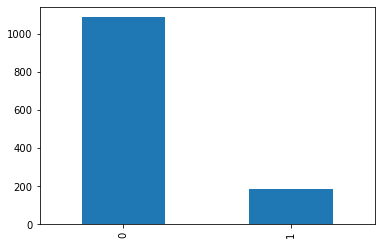

In [22]:
df['Touchscreen'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

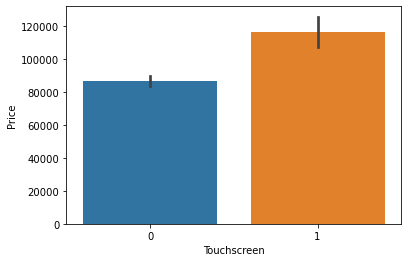

In [23]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

# Feature - 'IPS' , Create feature , using Regex & For iterator

In [24]:
mylist =[]
for values in df['ScreenResolution']:
    if re.search(r"IPS[ ]{1}", values):
        mylist.append(1)
    else:  
        mylist.append(0)
df["IPS"] = mylist  
df.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Rate,Price,Touchscreen,IPS
896,Dell,Inspiron 7567,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,1TB HDD,Nvidia GeForce GTX 1050Ti,Linux,2.62kg,929.00,80.12,74431.4800,0,0
852,Dell,Inspiron 5767,Notebook,17.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R7 M445,Linux,2.83kg,865.00,80.12,69303.8000,0,0
921,HP,EliteBook 850,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,AMD Radeon R7 M365X,Windows 10,1.84kg,1296.99,80.12,103914.8388,0,0
1189,Acer,Predator G9-793,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.2kg,2599.00,80.12,208231.8800,0,1
96,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.2kg,599.90,80.12,48063.9880,0,0


<AxesSubplot:>

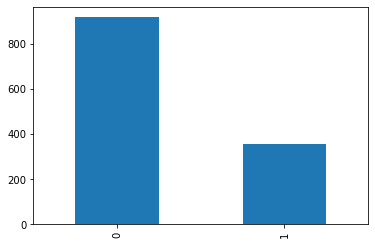

In [25]:
df['IPS'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='IPS', ylabel='Price'>

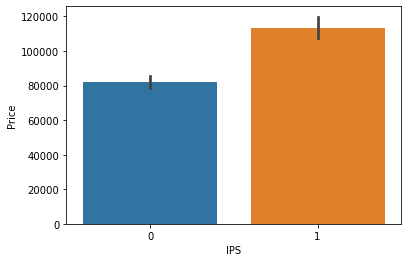

In [26]:
sns.barplot(x=df['IPS'],y=df['Price'])

# Feature - 'OPERATING SYSTEM' 

In [27]:
df['OpSys'].value_counts()

Windows 10      1048
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [28]:
#Function definition for simplifing/categorizing the operating system 
def cat_os(inp):
    if re.search(r"window", inp, re.IGNORECASE):
        return 'Windows'
    elif re.search(r"mac", inp, re.IGNORECASE):
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [29]:
# Function call
df['os'] = df['OpSys'].apply(cat_os)
df.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Rate,Price,Touchscreen,IPS,os
816,Razer,Blade Stealth,Ultrabook,12.5,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.29kg,1799.00,80.12,144135.8800,1,1,Windows
1009,HP,Probook 440,Notebook,14.0,1366x768,Intel Core i3 7100U 2.4GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.64kg,684.00,80.12,54802.0800,0,0,Windows
353,HP,Zbook 15,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,2.6kg,1738.27,80.12,139270.1924,0,0,Windows
1057,Acer,Aspire ES1-523,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,8GB,1TB HDD,AMD Radeon R5,Windows 10,2.4kg,449.00,80.12,35973.8800,0,0,Windows
358,Dell,Inspiron 3567,Notebook,15.6,Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,Windows 10,2.36kg,557.37,80.12,44656.4844,1,0,Windows


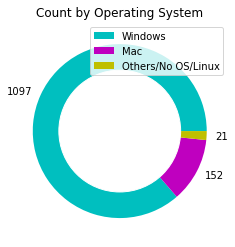

In [78]:
colors = [ 'c', 'm', 'y']
plt.pie(df['os'].value_counts(),colors=colors, labels= df['os'].value_counts())
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
labels = ['Windows', 'Mac',"Others/No OS/Linux"]
plt.legend(labels,loc=0)
plt.title('Count by Operating System')
plt.show()

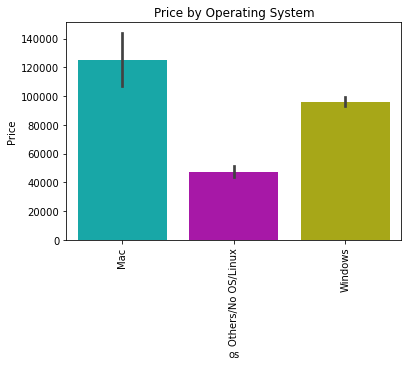

In [79]:
colors = [ 'c', 'm', 'y']
sns.barplot(x=df['os'],y=df['Price'],palette=colors)
plt.xticks(rotation='vertical')
plt.title('Price by Operating System')
plt.show()

#    Features - RAM & Weight

In [32]:
#remove GB from RAM & Kg from weight fields
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')
#cast RAM & weight to int
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1275 non-null   object 
 1   Product           1275 non-null   object 
 2   TypeName          1275 non-null   object 
 3   Inches            1275 non-null   float64
 4   ScreenResolution  1275 non-null   object 
 5   Cpu               1275 non-null   object 
 6   Ram               1275 non-null   int32  
 7   Memory            1275 non-null   object 
 8   Gpu               1275 non-null   object 
 9   OpSys             1275 non-null   object 
 10  Weight            1275 non-null   float32
 11  Price_euros       1275 non-null   float64
 12  Rate              1275 non-null   float64
 13  Price             1275 non-null   float64
 14  Touchscreen       1275 non-null   int64  
 15  IPS               1275 non-null   int64  
 16  os                1275 non-null   object 


In [49]:
df=df[df["Ram"].isin([24,64]) == False]

In [50]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Rate,Price,Touchscreen,IPS,os,cpu_frq(GHz),Cpu Name,Cpu Brand
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel,macOS,1.37,1339.69,80.12,107335.9628,0,1,Mac,2.3,Intel Core i5,Intel Core i5
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel,macOS,1.34,898.94,80.12,72023.0728,0,0,Mac,1.8,Intel Core i5,Intel Core i5
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel,No OS,1.86,575.00,80.12,46069.0000,0,0,Others/No OS/Linux,2.5,Intel Core i5,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD,macOS,1.83,2537.45,80.12,203300.4940,0,1,Mac,2.7,Intel Core i7,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel,macOS,1.37,1803.60,80.12,144504.4320,0,1,Mac,3.1,Intel Core i5,Intel Core i5


<AxesSubplot:xlabel='Weight', ylabel='Density'>

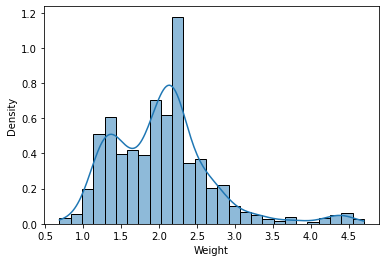

In [186]:
sns.histplot(df['Weight'],kde=True,stat ="density")

# Feature - 'GPU' 

In [36]:
df['Gpu'].value_counts()

Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [37]:
df['Gpu']=df['Gpu'].apply(lambda x:x.split()[0])
df.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Rate,Price,Touchscreen,IPS,os
72,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,AMD,Windows 10,2.20,870.00,80.12,69704.4000,0,0,Windows
988,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD,Windows 10,2.36,749.00,80.12,60009.8800,0,0,Windows
823,MSI,GL62M 7RD,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia,Windows 10,2.40,1199.00,80.12,96063.8800,0,0,Windows
218,Dell,Latitude 5490,Ultrabook,14.0,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel,Windows 10,1.60,1149.00,80.12,92057.8800,0,0,Windows
758,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia,Windows 10,4.42,2868.99,80.12,229863.4788,0,1,Windows


In [38]:
df['Gpu'].value_counts()

Intel     704
Nvidia    396
AMD       174
ARM         1
Name: Gpu, dtype: int64

# ---Remove Outlier GPU Brand = 'ARM'----

In [39]:
df = df[df['Gpu'] != 'ARM']

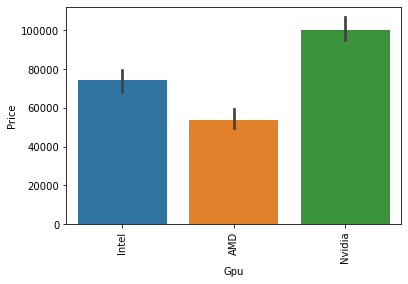

In [40]:
#using  numpy as np & matplotlib.pyplot as plt

x_plot = df['Gpu']
y_plot = df['Price']
estimator_chosen = np.median

sns.barplot(x=x_plot , y=y_plot, estimator = estimator_chosen )
plt.xticks(rotation='vertical')
plt.show()

# Feature - 'CPU' 

In [41]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core i3 6100U 2.1GHz       1
AMD E-Series E2-9000 2.2GHz      1
Intel Core M M3-6Y30 0.9GHz      1
Intel Core i5 2.9GHz             1
AMD A9-Series 9410 2.9GHz        1
Name: Cpu, Length: 117, dtype: int64

In [42]:
df['cpu_frq(GHz)']=df['Cpu'].str.extract(r"(\d+(?:\.\d+)\s*GHz)")
df['cpu_frq(GHz)']=df['cpu_frq(GHz)'].str.replace("GHz","")
df['cpu_frq(GHz)']=df['cpu_frq(GHz)'].astype(float)
df.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Rate,Price,Touchscreen,IPS,os,cpu_frq(GHz)
1114,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4,64GB Flash Storage,Intel,Android,0.69,549.00,80.12,43985.8800,1,1,Others/No OS/Linux,1.44
526,Lenovo,IdeaPad 320-15IKB,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4,1TB HDD,Nvidia,Windows 10,2.20,799.00,80.12,64015.8800,0,0,Windows,2.70
611,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,1TB HDD,Nvidia,Windows 10,2.59,879.01,80.12,70426.2812,0,0,Windows,2.60
737,Dell,Inspiron 5379,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,1TB HDD,Intel,Windows 10,1.55,659.00,80.12,52799.0800,1,0,Windows,1.60
307,Toshiba,Satellite Pro,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Nvidia,Windows 10,2.20,1043.00,80.12,83565.1600,0,1,Windows,2.50


In [43]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [44]:
#define function
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [45]:
#call function
df['Cpu Brand'] = df['Cpu Name'].apply(fetch_processor)

In [46]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Rate,Price,Touchscreen,IPS,os,cpu_frq(GHz),Cpu Name,Cpu Brand
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel,macOS,1.37,1339.69,80.12,107335.9628,0,1,Mac,2.3,Intel Core i5,Intel Core i5
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel,macOS,1.34,898.94,80.12,72023.0728,0,0,Mac,1.8,Intel Core i5,Intel Core i5
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel,No OS,1.86,575.00,80.12,46069.0000,0,0,Others/No OS/Linux,2.5,Intel Core i5,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD,macOS,1.83,2537.45,80.12,203300.4940,0,1,Mac,2.7,Intel Core i7,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel,macOS,1.37,1803.60,80.12,144504.4320,0,1,Mac,3.1,Intel Core i5,Intel Core i5


<AxesSubplot:title={'center':'Count by CPU'}>

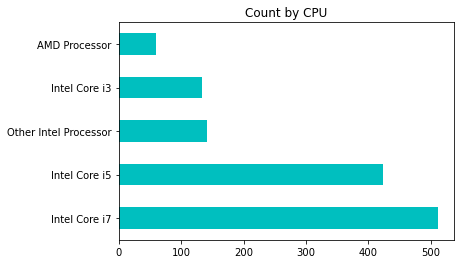

In [115]:
df['Cpu Brand'].value_counts().plot(kind='barh',color="c",title= 'Count by CPU' , rot=0 )

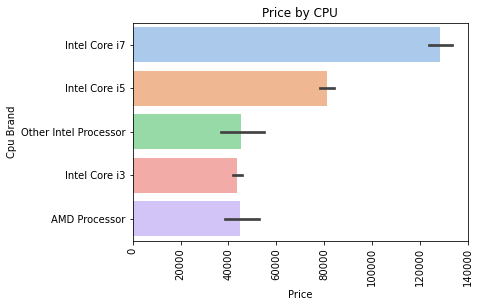

In [112]:
sns.barplot(y=df['Cpu Brand'],x=df['Price'],palette="pastel",order=df['Cpu Brand'].value_counts().index)
plt.xticks(rotation='vertical')
plt.title('Price by CPU')
plt.show()

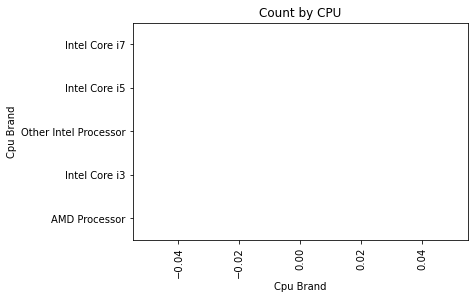

In [116]:
sns.barplot(y=df['Cpu Brand'],x=df['Cpu Brand'].value_counts(),palette="pastel",order=df['Cpu Brand'].value_counts().index)
plt.xticks(rotation='vertical')
plt.title('Count by CPU')
plt.show()

# Features - 'Memory' 

In [117]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          215
500GB HDD                        124
512GB SSD                        112
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              72
32GB Flash Storage                35
2TB HDD                           16
512GB SSD +  1TB HDD              14
64GB Flash Storage                13
1TB SSD                           13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [177]:
mylist_memory =[]
for values in df["Memory"]:
    values = re.sub(r'\.0', '',values)
    values = re.sub(r'TB', '000',values)
    values = re.sub(r'GB', '',values)
    #print(values)
    mylist_memory.append(values)
df["Memory"] = mylist_memory 

In [178]:
df['Memory'].value_counts()

256 SSD                         412
1000 HDD                        216
500 HDD                         124
512 SSD                         112
128 SSD +  1000 HDD              94
128 SSD                          74
256 SSD +  1000 HDD              72
32 Flash Storage                 35
2000 HDD                         16
512 SSD +  1000 HDD              14
64 Flash Storage                 13
1000 SSD                         13
256 SSD +  2000 HDD              10
256 Flash Storage                 8
16 Flash Storage                  7
1000 Hybrid                       7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD          

In [179]:
#split each string value in df into two parts
new = df["Memory"].str.split("+", n = 1, expand = True)

df["part1"]= new[0]
df["part1"]=df["part1"].str.strip()
#The strip() method removes any leading (spaces at the beginning) and trailing (spaces at the end) characters
df["part2"]= new[1]

df["part1HDD"] = df["part1"].apply(lambda x: 1 if "HDD" in x else 0)
df["part1SSD"] = df["part1"].apply(lambda x: 1 if "SSD" in x else 0)
df["part1Hybrid"] = df["part1"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["part1Flash_Storage"] = df["part1"].apply(lambda x: 1 if "Flash Storage" in x else 0)
# replace non digits
df['part1'] = df['part1'].str.replace(r'\D', '')
# replace NULLS with 0
df["part2"].fillna("0", inplace = True)

df["part2HDD"] = df["part2"].apply(lambda x: 1 if "HDD" in x else 0)
df["part2SSD"] = df["part2"].apply(lambda x: 1 if "SSD" in x else 0)
df["part2Hybrid"] = df["part2"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["part2Flash_Storage"] = df["part2"].apply(lambda x: 1 if "Flash Storage" in x else 0)
# replace non digits
df['part2'] = df['part2'].str.replace(r'\D', '')

df["part1"] = df["part1"].astype(int)
df["part2"] = df["part2"].astype(int)

df["HDD"]=(df["part1"]*df["part1HDD"]+df["part2"]*df["part2HDD"])
df["SSD"]=(df["part1"]*df["part1SSD"]+df["part2"]*df["part2SSD"])
df["Hybrid"]=(df["part1"]*df["part1Hybrid"]+df["part2"]*df["part2Hybrid"])
df["Flash_Storage"]=(df["part1"]*df["part1Flash_Storage"]+df["part2"]*df["part2Flash_Storage"])

df.drop(columns=['part1', 'part2', 'part1HDD', 'part1SSD', 'part1Hybrid',
       'part1Flash_Storage', 'part2HDD', 'part2SSD', 'part2Hybrid',
       'part2Flash_Storage'],inplace=True)

In [172]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,IPS,os,cpu_frq(GHz),Cpu Name,Cpu Brand,memory_2,HDD,SSD,Hybrid,Flash_Storage
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel,macOS,...,1,Mac,2.3,Intel Core i5,Intel Core i5,128 SSD,0,128,0,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel,macOS,...,0,Mac,1.8,Intel Core i5,Intel Core i5,128 Flash Storage,0,0,0,128
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel,No OS,...,0,Others/No OS/Linux,2.5,Intel Core i5,Intel Core i5,256 SSD,0,256,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD,macOS,...,1,Mac,2.7,Intel Core i7,Intel Core i7,512 SSD,0,512,0,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel,macOS,...,1,Mac,3.1,Intel Core i5,Intel Core i5,256 SSD,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel,Windows 10,...,1,Windows,2.5,Intel Core i7,Intel Core i7,128 SSD,0,128,0,0
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel,Windows 10,...,1,Windows,2.5,Intel Core i7,Intel Core i7,512 SSD,0,512,0,0
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel,Windows 10,...,0,Windows,1.6,Intel Celeron Dual,Other Intel Processor,64 Flash Storage,0,0,0,64
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD,Windows 10,...,0,Windows,2.5,Intel Core i7,Intel Core i7,1000 HDD,1000,0,0,0


In [ ]:
#df.drop(columns=['Memory'],inplace=True)
#df.corr()['Price']
#df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

<AxesSubplot:xlabel='Weight', ylabel='Price'>

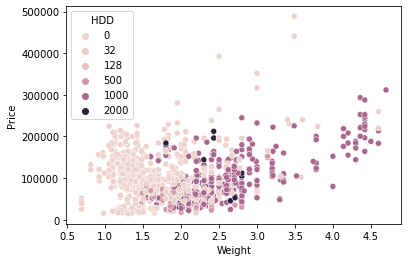

In [185]:
sns.scatterplot(x=df['Weight'],y=df['Price'], hue=df["HDD"])